# Handwriting Recognition

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

2023-10-31 10:49:46.453590: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [3]:
X_train = mnist_train_images.reshape(60000, 784)
X_test = mnist_test_images.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
y_train = keras.utils.to_categorical(mnist_train_labels, 10)
y_test = keras.utils.to_categorical(mnist_test_labels, 10)

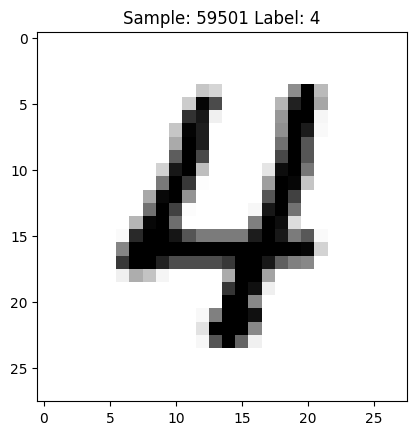

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample(num):
    label = np.argmax(y_train[num])
    image = X_train[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

num = np.random.randint(0, X_train.shape[0])
display_sample(num)

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

2023-10-31 10:49:52.775282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/10
600/600 - 4s - loss: 0.2346 - accuracy: 0.9277 - val_loss: 0.0948 - val_accuracy: 0.9683 - 4s/epoch - 7ms/step
Epoch 2/10
600/600 - 4s - loss: 0.0999 - accuracy: 0.9705 - val_loss: 0.0869 - val_accuracy: 0.9732 - 4s/epoch - 7ms/step
Epoch 3/10
600/600 - 3s - loss: 0.0770 - accuracy: 0.9769 - val_loss: 0.0843 - val_accuracy: 0.9760 - 3s/epoch - 6ms/step
Epoch 4/10
600/600 - 4s - loss: 0.0631 - accuracy: 0.9815 - val_loss: 0.0796 - val_accuracy: 0.9798 - 4s/epoch - 6ms/step
Epoch 5/10
600/600 - 4s - loss: 0.0558 - accuracy: 0.9837 - val_loss: 0.0832 - val_accuracy: 0.9797 - 4s/epoch - 6ms/step
Epoch 6/10
600/600 - 3s - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0752 - val_accuracy: 0.9827 - 3s/epoch - 6ms/step
Epoch 7/10
600/600 - 3s - loss: 0.0425 - accuracy: 0.9881 - val_loss: 0.0846 - val_accuracy: 0.9803 - 3s/epoch - 6ms/step
Epoch 8/10
600/600 - 3s - loss: 0.0404 - accuracy: 0.9890 - val_loss: 0.0779 - val_accuracy: 0.9819 - 3s/epoch - 6ms/step
Epoch 9/10
600/600 - 4s 

In [10]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08837202191352844
Test accuracy: 0.984499990940094


1/1 [==============================] - 0s 22ms/step


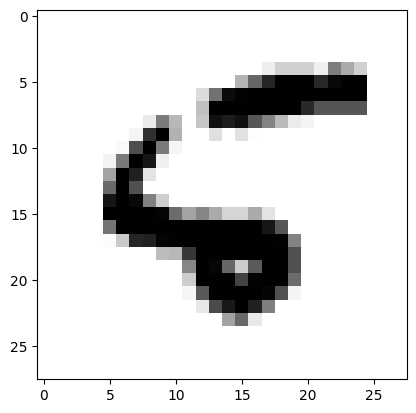

Original Labels: 5
Model prediction: 6
1/1 [==============================] - 0s 19ms/step


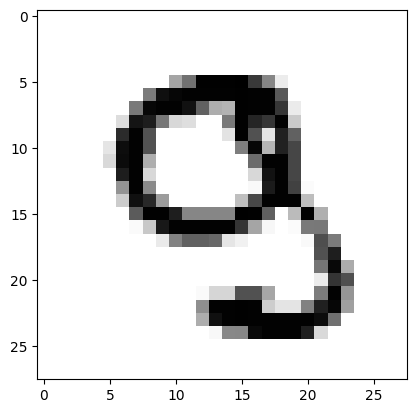

Original Labels: 9
Model prediction: 8
1/1 [==============================] - 0s 19ms/step


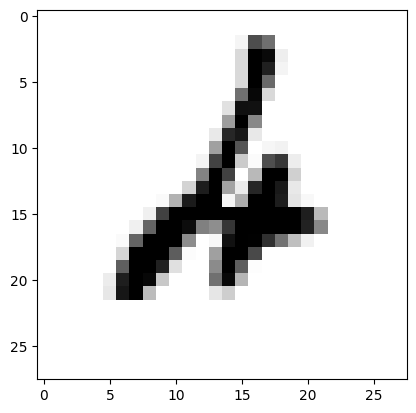

Original Labels: 4
Model prediction: 6
1/1 [==============================] - 0s 18ms/step


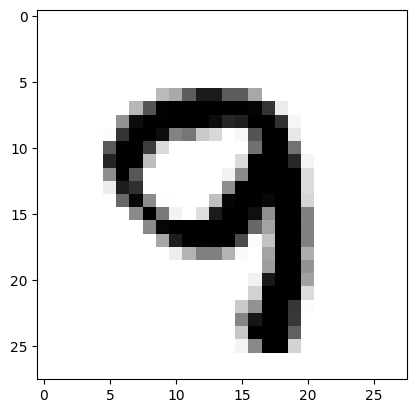

Original Labels: 9
Model prediction: 3
1/1 [==============================] - 0s 20ms/step


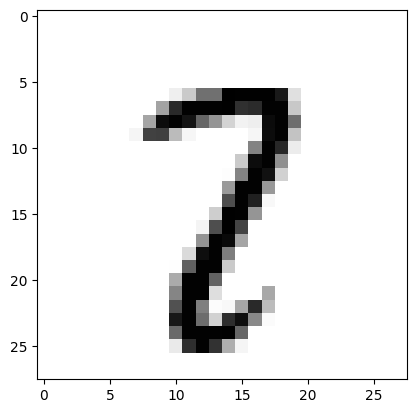

Original Labels: 2
Model prediction: 7
1/1 [==============================] - 0s 22ms/step


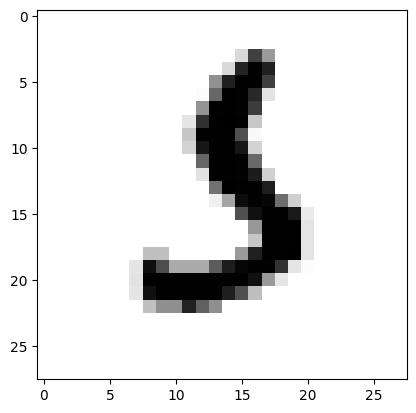

Original Labels: 5
Model prediction: 3
1/1 [==============================] - 0s 25ms/step


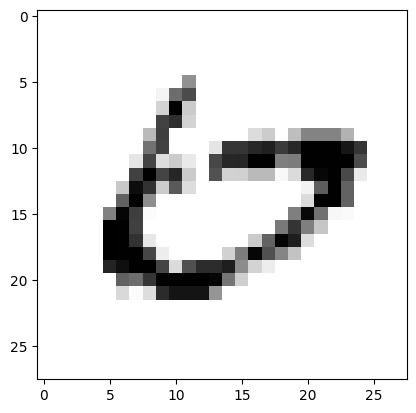

Original Labels: 6
Model prediction: 0
1/1 [==============================] - 0s 26ms/step


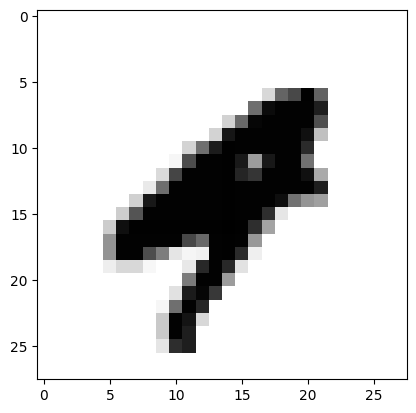

Original Labels: 4
Model prediction: 9
1/1 [==============================] - 0s 25ms/step


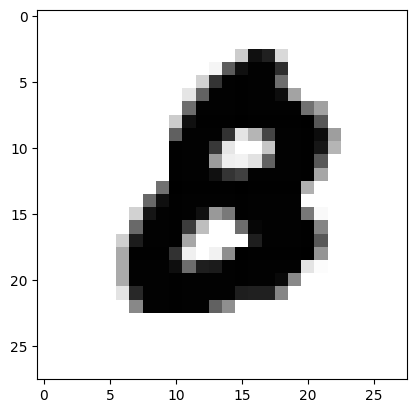

Original Labels: 8
Model prediction: 0
1/1 [==============================] - 0s 35ms/step


In [11]:
for i in range(500):
    test_image = X_test[i, :].reshape(1, 784)
    true_label = y_test[i].argmax()
    model_prediction = model.predict(test_image).argmax()
    if (model_prediction!= true_label):
        plt.imshow(test_image.reshape([28, 28]), cmap='gray_r')
        plt.show()
        print("Original Labels: %i" % true_label)
        print("Model prediction: %i" % model_prediction)